## Prediction Using Supervised ML
### predict the precentage of a student based on the no of study hours.
###  This is a simple Linear regression task as it involves just two variables
### what will be the predicted score if a student studies for 9.25 hrs/day ?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
url = "http://bit.ly/w-data"

df = pd.read_csv(url)


In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


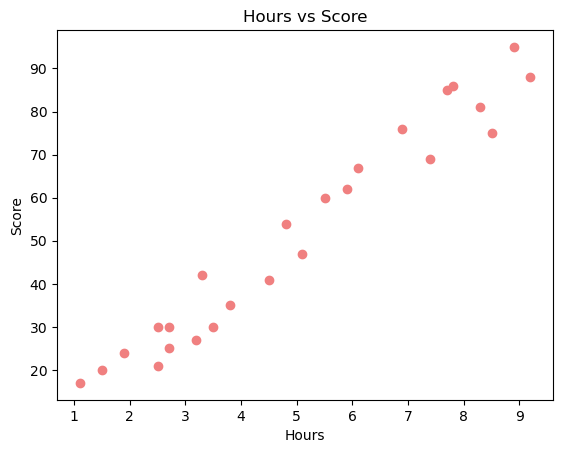

In [11]:
# Relationship between Hours and Score
plt.scatter(df['Hours'], df['Scores'], color = 'lightcoral')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
#plt.box(False)
plt.show()

In [12]:
X = df.iloc[:, :1]  # independent
y = df.iloc[:, 1:2]  # dependent

In [13]:
train_test_split(X, y, test_size = 0.2, random_state = 40)

[    Hours
 3     8.5
 21    4.8
 2     3.2
 11    5.9
 17    1.9
 4     3.5
 8     8.3
 16    2.5
 22    3.8
 20    2.7
 0     2.5
 9     2.7
 10    7.7
 23    6.9
 12    4.5
 1     5.1
 18    6.1
 5     1.5
 7     5.5
 6     9.2,
     Hours
 15    8.9
 24    7.8
 14    1.1
 19    7.4
 13    3.3,
     Scores
 3       75
 21      54
 2       27
 11      62
 17      24
 4       30
 8       81
 16      30
 22      35
 20      30
 0       21
 9       25
 10      85
 23      76
 12      41
 1       47
 18      67
 5       20
 7       60
 6       88,
     Scores
 15      95
 24      86
 14      17
 19      69
 13      42]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

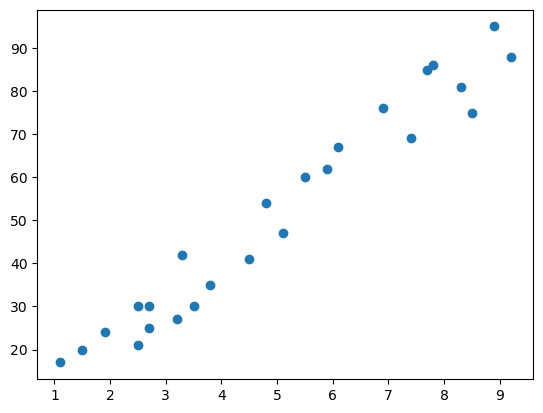

In [15]:
plt.scatter(X,y)

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_test = reg.predict(X_test) 
y_pred_test

array([[28.50825781],
       [60.29812296],
       [75.19962225],
       [34.46885752],
       [39.43602395]])

In [21]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([[52.35065667],
       [56.32438982],
       [20.56079152],
       [28.50825781],
       [78.17992211],
       [12.61332523],
       [33.47542424],
       [16.58705838],
       [86.1273884 ],
       [90.10112154],
       [62.28498953],
       [70.23245582],
       [26.52139124],
       [93.0814214 ],
       [49.37035681],
       [84.14052182],
       [46.39005696],
       [79.17335539],
       [26.52139124],
       [36.4557241 ]])

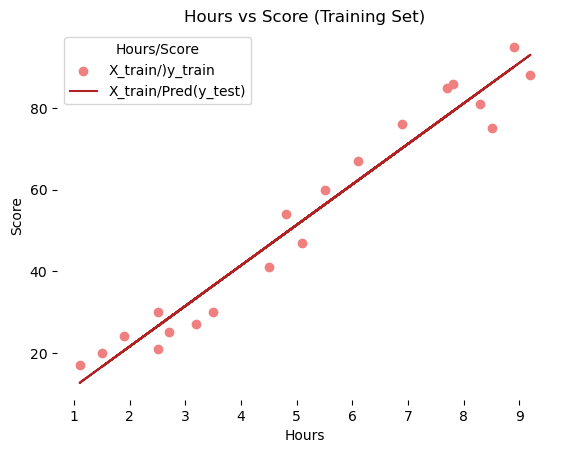

In [22]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Hours vs Score (Training Set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend(['X_train/)y_train', 'X_train/Pred(y_test)'], title = 'Hours/Score', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [23]:
reg.predict([[9.25]])

C:\Users\huma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[93.57813804]])

In [24]:
print(f'Coefficient: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print('y = ', reg.intercept_, '+', reg.coef_, '* X')

Coefficient: [[9.93433286]]
Intercept: [1.68555909]
y =  [1.68555909] + [[9.93433286]] * X


In [25]:
print('MSE = ', mean_squared_error(y_test, y_pred_test ))
print('R2 = ', r2_score(y_test, y_pred_test ))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test )))

MSE =  23.990682356018976
R2 =  0.8970533712838183
RMSE =  4.898028415191053
